# 1. Понимание бизнеса

## 1.1 Цель
Предсказать субьективную оценку качества белого вина по его химическим показателям 

## 1.2 Описание

С помощью данных о важных химических параметрах Португальскогих вин "Виньё Верде" и их оценках этих вин в данной задаче будет проведено ислледование влияния объективных показателй на вопринимаемое качество, что поможет виноделам в процессах моделирования и тестирования новых технологических процессов, использемых сортов и пр. при производстве вин
 
[Описание от Kaggle](https://www.kaggle.com/rajyellow46/wine-quality)

# 2. Data Understanding

## 2.1 Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2.2 Загрузка данных

In [2]:
df = pd.read_csv("winequalityN.csv")

## 2.3 Статистика и визуализации

#### 2.3.1 Основные параметры данных и главные описательные статистики

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


**Описание переменных**

    1 - fixed acidity - КИСЛОТЫ НЕЛЕТУЧИЕ И ФИКСИРОВАННЫЕ
    2 - volatile acidity - ЛЕТУЧИЕ КИСЛОТЫ
    3 - citric acid - ЛИМОННАЯ КИСЛОТА
    4 - residual sugar -ОСТАТОЧНЫЙ САХАР
    5 - chlorides -ХЛОРИДЫ
    6 - free sulfur dioxide - СВОБОДНЫЙ ДИОКСИД СЕРЫ
    7 - total sulfur dioxide - ДИОКСИД СЕРЫ ВСЕГО
    8 - density - ПЛОТНОСТЬ
    9 - pH - КИСЛОТНО-ЩЕЛОЧНОЙ БАЛАНС
    10 - sulphates - СУЛЬФАТЫ
    11 - alcohol - АЛКОГОЛЬ

    12 - quality (score between 0 and 10) - ОЦЕНКА

#### 2.3.2 Визуализация корреляций и самые значимые

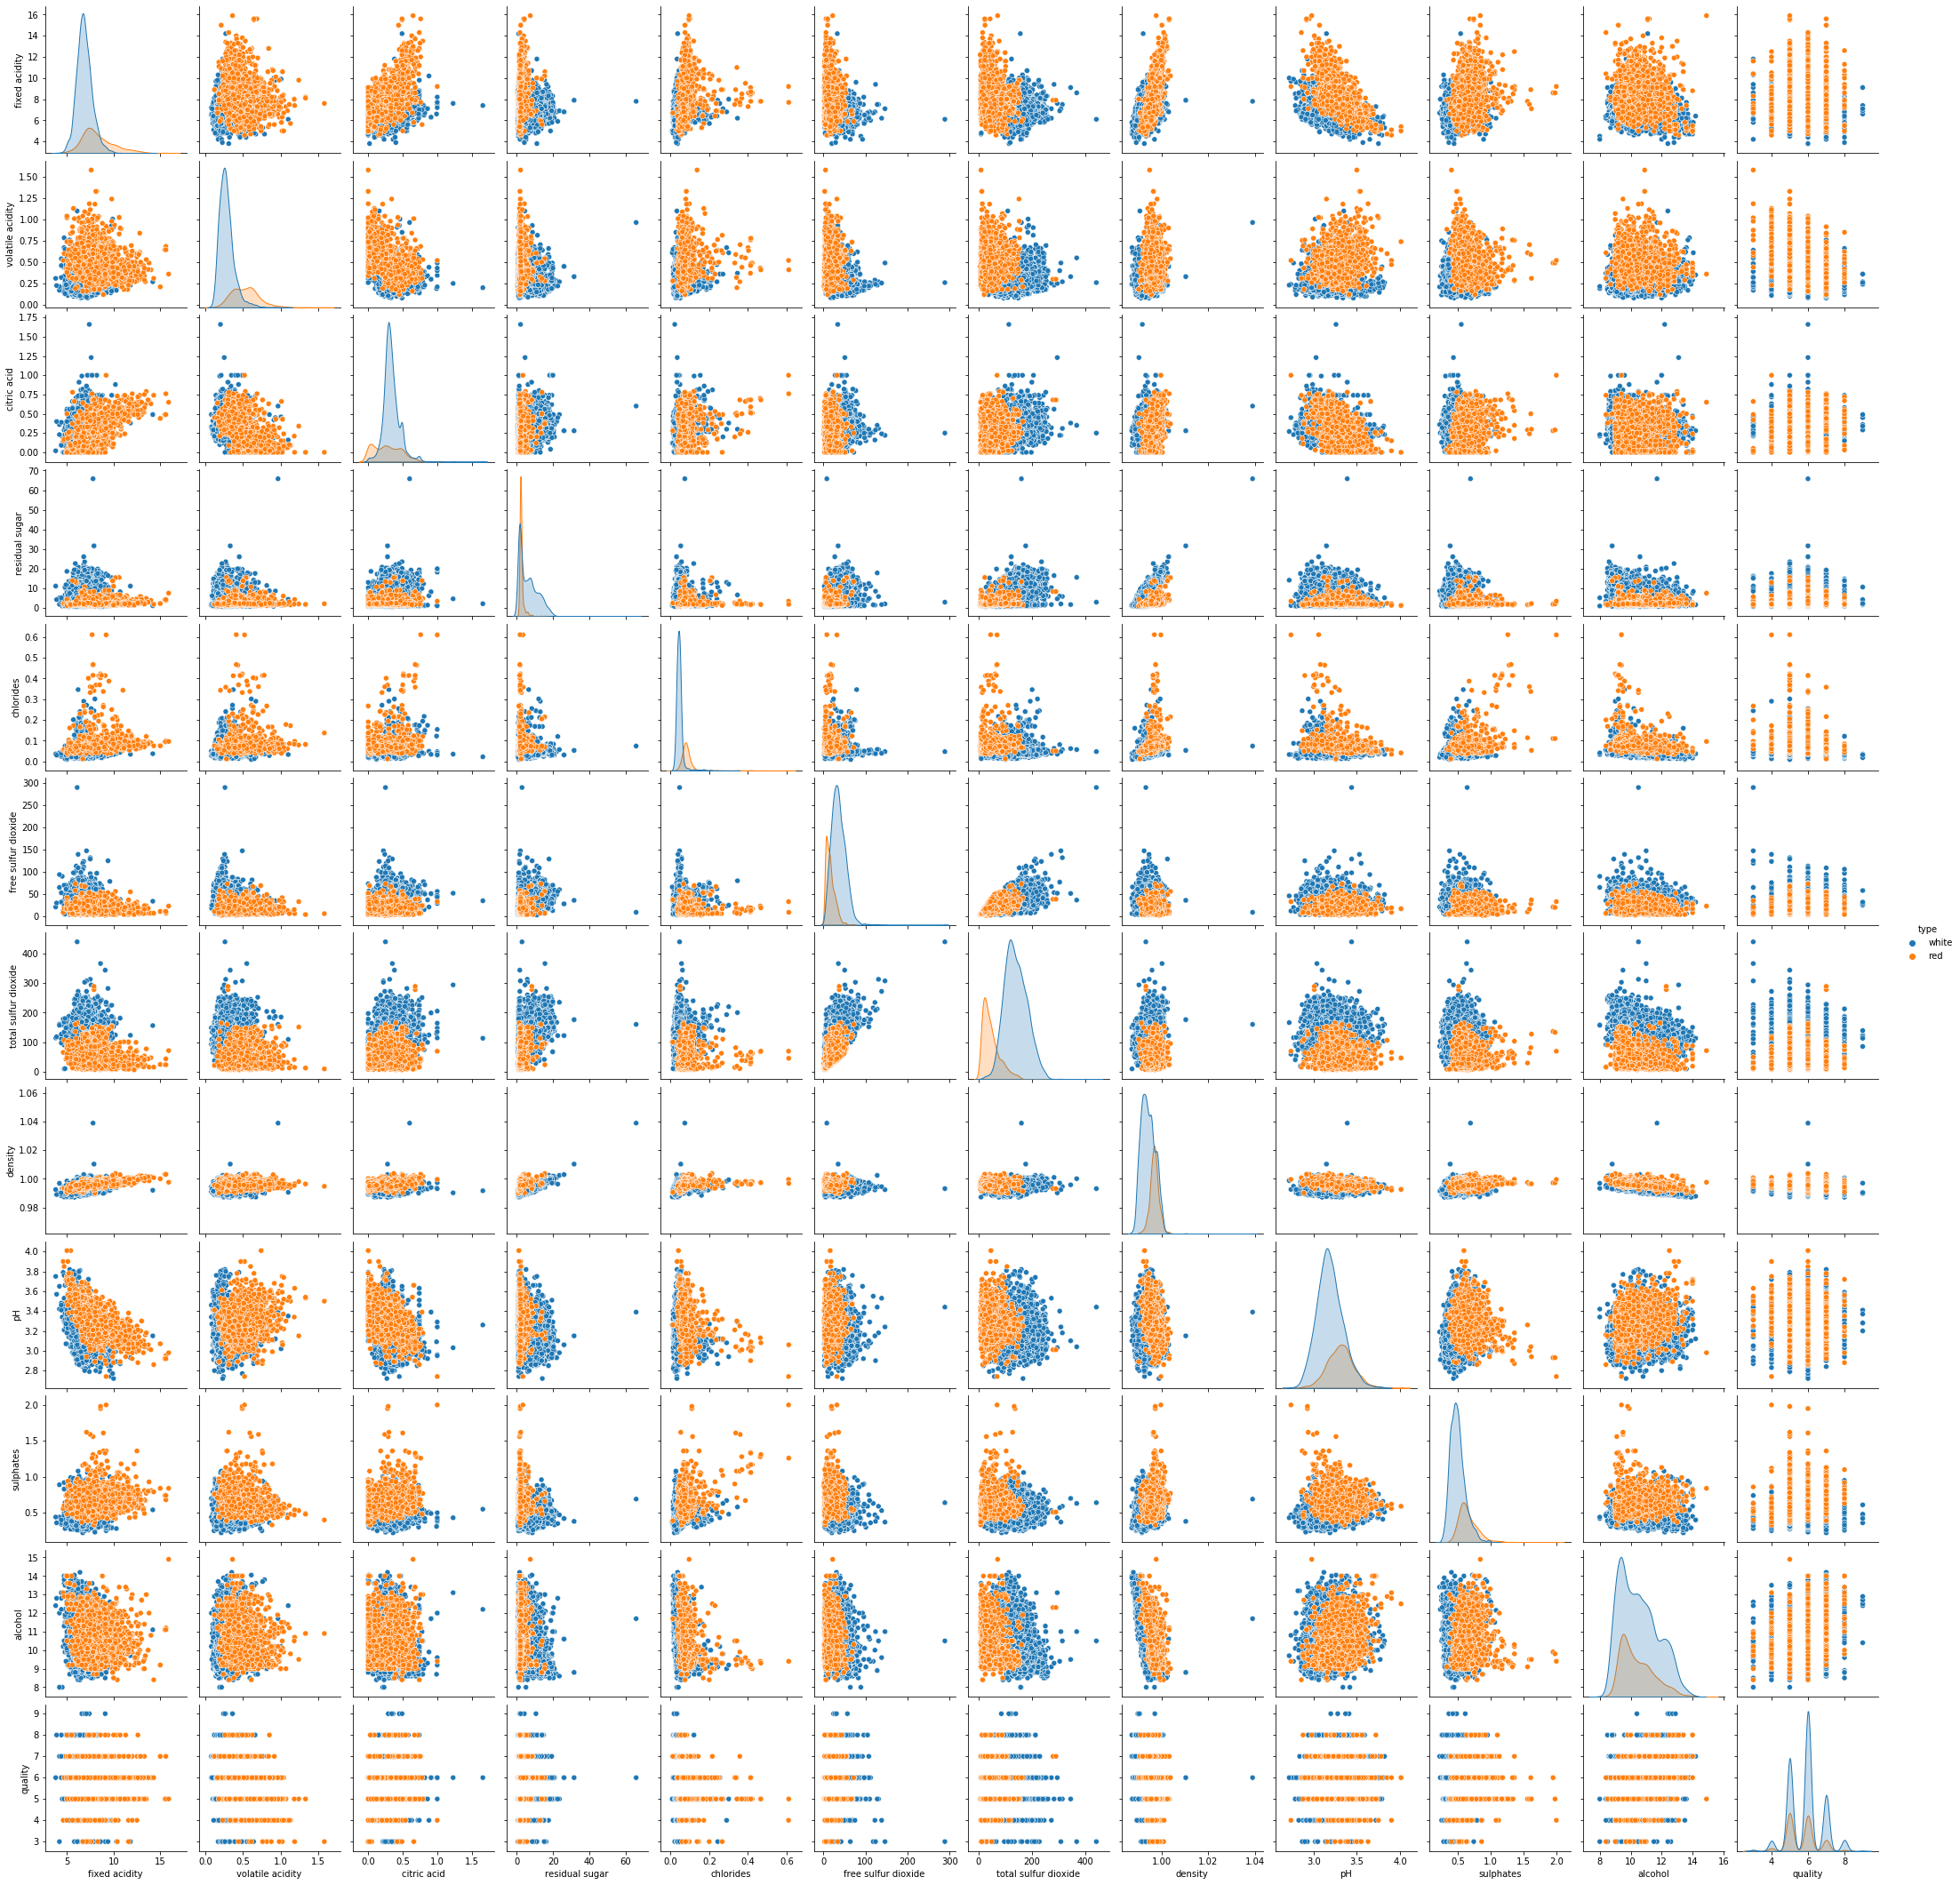

In [5]:
sns.pairplot(df, hue='type')

In [6]:
cor= df.corr()
cor.loc[:,:] = np.tril(cor,k=-1)  # reference:https://www.geeksforgeeks.org/numpy-tril-python/
cor=cor.stack()
cor[(cor > 0.5) | (cor< -0.5)]

total sulfur dioxide  free sulfur dioxide    0.720934
density               residual sugar         0.552498
alcohol               density               -0.686745
dtype: float64

# 3. Data Preparation

## 3.1 Преобразованиие категориальных переменных в числовые

Переменная Type - категориальная. Некоторые из  алгоритмов могут обрабатывать только числовые значения,и т.к. у нее всего два значения заменим их на 0 и 1

In [7]:
df = pd.get_dummies(data = df, columns = ['type'] , prefix = ['type'] , drop_first = True)

## 3.2 Заполнить пропущенные значения в переменных
Большинство алгоритмов машинного обучения требуют, чтобы все переменные имели значения, чтобы использовать их для обучения модели. Самый простой метод - заполнить пропущенные значения средним по переменной для всех наблюдений в обучающем наборе.

In [8]:
df.isna().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_white               0
dtype: int64

In [9]:
#Replacing the null values with the median

df = df.fillna(df.mean())

## 3.3 Сгруппировать оценки по более значимым группам

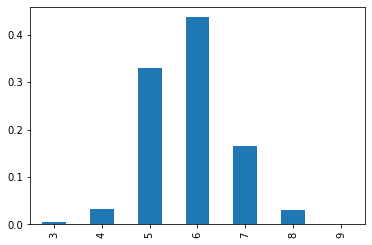

In [10]:
df["quality"].value_counts(normalize=True).sort_index().plot.bar()

In [11]:
df['quality'] = df['quality'].replace(4,3)
df['quality'] = df['quality'].replace(8,9)
df['quality'].value_counts().sort_index()

3     246
5    2138
6    2836
7    1079
9     198
Name: quality, dtype: int64

## 3.4 Создание датасетов

Отделяем данные для обучения и для проверки

In [12]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(df.drop('quality',axis=1), df['quality'], test_size=0.33,
                                                   random_state=9)
X_train.shape,X_test.shape

((4352, 12), (2145, 12))

# 4. Моделирование
Теперь мы выберем модель, которую хотели бы попробовать. Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

## 4.1 Выбор модели
Хорошей отправной точкой является случайный лес.

In [13]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 80)
rfcl = rfcl.fit(X_train, y_train)
pred_RF = rfcl.predict(X_test)

# 5. Оценка
Теперь мы собираемся оценить модель

## 5.1 Модель
Мы можем оценить точность модели, используя набор для валидации, где мы знаем фактический результат. Этот набор данных не использовался для обучения, поэтому он абсолютно новый для модели.

Затем мы сравниваем точность с точностью при использовании модели на тренировочных данных. Если разница между ними значительна, это свидетельствует о переобучении. Мы стараемся избегать этого, потому что это означает, что модель не будет хорошо обобщаться на новые данные (будет работать плохо)

In [14]:
accuracy_score(y_test, pred_RF)

0.6843822843822844

# 6. Развертывание

Развертывание в данном означает публикацию полученного прогноза

In [15]:
prediction = rfcl.predict(X_test)
alcohol = df.alcohol
test = pd.DataFrame( { 'alcohol': alcohol , 'prediction': y_test } )
test.shape
test.head()
test.to_csv( 'alcohol_pred.csv' , index = False )